# Język R
## Postawowe informacje
Język programowania oraz implementujący go system R jest środowiskiem do statystycznej analizy danych. Umożliwia pracę interaktywną i skryptową.
 
Instalacja na Ubuntu:

```apt-get install r-base```

Jak dodać kernel R do Jupitera:

https://datatofish.com/r-tutorials/

Linki:
 - Strona główna projektu R: http://www.r-project.org/
 - Quick R: http://www.statmethods.net/
 - RStudio: https://www.rstudio.com/
 - R for Data Science: https://r4ds.had.co.nz/
 - R Packages (zaawansowana): https://r-pkgs.org/
 - ggplot2: https://ggplot2-book.org/

## Interaktywna praca z systemem

Jest kilka możliwości:

 - Uruchamiamy RStudio, które zawiera zintegrowane środowisko do analizy danych w języku R
 - Można też uruchomić konsolę R bezpośrednio poleceniem R
 - W Jupyter tworzymy nowy notatnik z kernelem R

### Instalacja pakietów

`tidyverse` to zbiór kilku użytecznych pakietów, m.in. `dplyr` i `ggplot`. Więcej na https://www.tidyverse.org/packages/

Na  https://jupyter.lab.ii.agh.edu.pl/ pakiet jest już zainstalowany.

In [ ]:
# install.packages('tidyverse')
#albo dla Anacondy anaconda.org/r/r-tidyverse
#w terminalu conda install -c r r-tidyverse 

: 

In [2]:
# pokazuje też ewentualne "przykrycia"
library("tidyverse")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
<U+221A> ggplot2 3.1.1       <U+221A> purrr   0.3.2  
<U+221A> tibble  2.1.1       <U+221A> dplyr   0.8.0.1
<U+221A> tidyr   0.8.3       <U+221A> stringr 1.4.0  
<U+221A> readr   1.3.1       <U+221A> forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


### R

Wbudowana pomoc:

In [3]:
help()

In [4]:
help(plot)

bieżący katalog

In [5]:
getwd()

[1] "C:/Users/kzaja/mownit23/mownit"

zmiana katalogu bieżącego
```
setwd("~")
```

#### Proste obliczenia

In [6]:
2+2

[1] 4

Przypisanie 

więcej o rodzajach przypisania: http://stat.ethz.ch/R-manual/R-patched/library/base/html/assignOps.html

In [7]:
a <- 2 # najczęściej stosowane

In [8]:
a = 2

Działanie:

In [9]:
a * 2

[1] 4

#### Wektory

Tworzenie wektorów - funkcja `c()` 

In [10]:
x <- c(1,2,3,4)
z <- x*2
z

[1] 2 4 6 8

In [11]:
y <- 2*(1:4)
x+y

[1]  3  6  9 12

Funkcje

In [12]:
seq(1, 10, 2) 

[1] 1 3 5 7 9

In [13]:
x <- seq(1, 10)

In [14]:
sum(x)

[1] 55

In [15]:
sqrt(x)

[1] 1.000000 1.414214 1.732051 2.000000 2.236068 2.449490 2.645751 2.828427
 [9] 3.000000 3.162278

## Import i przekształcanie danych

R umożliwia wczytywanie danych z baz danych i plików w różnych formatach.

Przykład: import z pliku CSV.

Do importu służy funkcja `read.csv`

Przykładowy plik: [data1.txt](https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/R/data1.txt)

Kolumny `t1` i `t2` zawierają wyniki "pomiarów" czasu dla 2 "algorytmów".

In [16]:
results = read.csv("data1.txt")

Zaimportowane dane są w postaci tabeli (data frame).

In [17]:
results

n,t1,t2
1,1.1,2.3
2,2.0,4.1
3,2.8,6.0
4,4.2,8.2
5,5.1,9.9
6,5.9,12.1
7,6.7,14.1
8,8.0,15.9
9,9.1,18.1
10,10.1,19.9


In [18]:
print(results)

    n   t1   t2
1   1  1.1  2.3
2   2  2.0  4.1
3   3  2.8  6.0
4   4  4.2  8.2
5   5  5.1  9.9
6   6  5.9 12.1
7   7  6.7 14.1
8   8  8.0 15.9
9   9  9.1 18.1
10 10 10.1 19.9


Pobranie kolumny (data frame):

In [19]:
results[1]

n
1
2
3
4
5
6
7
8
9
10


Pobranie kolumny jako wektor:

In [20]:
results[[1]]

[1]  1  2  3  4  5  6  7  8  9 10

pobranie kolumny po nazwie:

In [21]:
results["t1"]

t1
1.1
2.0
2.8
4.2
5.1
5.9
6.7
8.0
9.1
10.1


Pobranie wiersza lub wierszy:

In [22]:
results[2,] # drugi wiersz, wszystkie kolumny

,n,t1,t2
2,2,2,4.1


In [23]:
results[c(2,4,6),]

,n,t1,t2
2,2,2.0,4.1
4,4,4.2,8.2
6,6,5.9,12.1


`attach` (dodanie tabeli do kontekstu) pozwala na pojedyncze odwołania do kolumn (jako wektorów) bez odwoływania sie do calej tabeli:

In [29]:
attach(results)

t1

[1]  1.1  2.0  2.8  4.2  5.1  5.9  6.7  8.0  9.1 10.1

In [25]:
t2

[1]  2.3  4.1  6.0  8.2  9.9 12.1 14.1 15.9 18.1 19.9

In [26]:
n

[1]  1  2  3  4  5  6  7  8  9 10

In [27]:
detach(results)

In [28]:
# generuje blad 
t1

ERROR: Error in eval(expr, envir, enclos): nie znaleziono obiektu 't1'


### Wczytywanie w tidyverse

W tidyverse dane wczytywane są do `tibble` - "ulepszony" data.frame

In [30]:
# proszę zwrócić uwagę na _ zamiast .
results2 = read_csv("data1.txt")

Parsed with column specification:
cols(
  n = col_double(),
  t1 = col_double(),
  t2 = col_double()
)


In [31]:
results2
# to samo co data.frame

n,t1,t2
1,1.1,2.3
2,2.0,4.1
3,2.8,6.0
4,4.2,8.2
5,5.1,9.9
6,5.9,12.1
7,6.7,14.1
8,8.0,15.9
9,9.1,18.1
10,10.1,19.9


In [32]:
print(results2)
# zawiera rozmiar i informacje o typach

# A tibble: 10 x 3
       n    t1    t2
   <dbl> <dbl> <dbl>
 1     1   1.1   2.3
 2     2   2     4.1
 3     3   2.8   6  
 4     4   4.2   8.2
 5     5   5.1   9.9
 6     6   5.9  12.1
 7     7   6.7  14.1
 8     8   8    15.9
 9     9   9.1  18.1
10    10  10.1  19.9


## Rysowanie wykresów

In [33]:
results

n,t1,t2
1,1.1,2.3
2,2.0,4.1
3,2.8,6.0
4,4.2,8.2
5,5.1,9.9
6,5.9,12.1
7,6.7,14.1
8,8.0,15.9
9,9.1,18.1
10,10.1,19.9


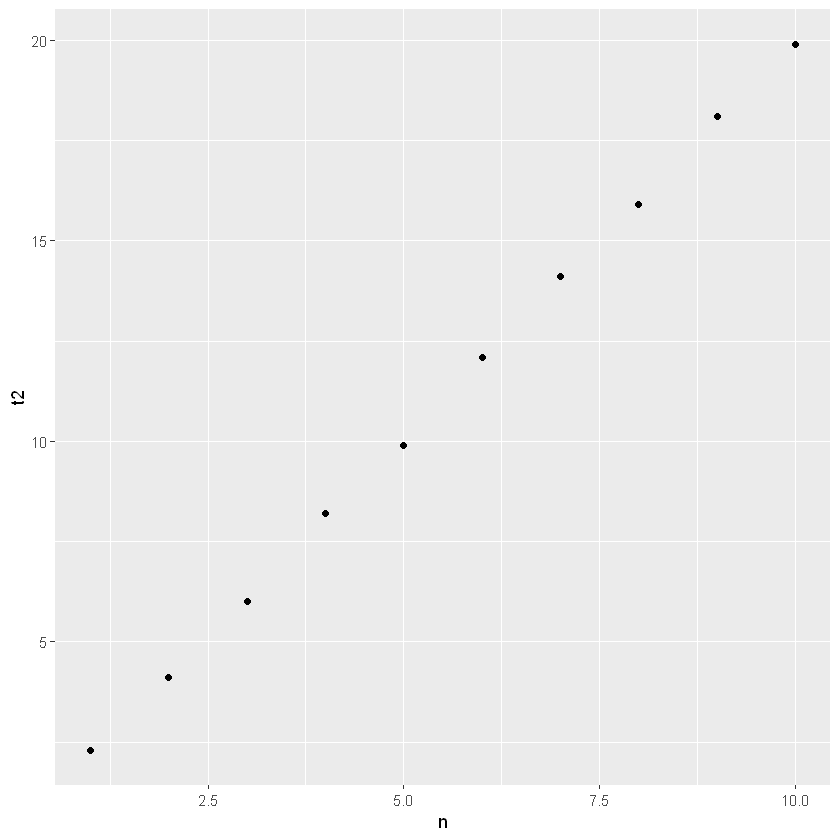

In [34]:
a <- ggplot(results, aes(x=n, y=t2)) + geom_point()
a
# nie używamy "" w aes!

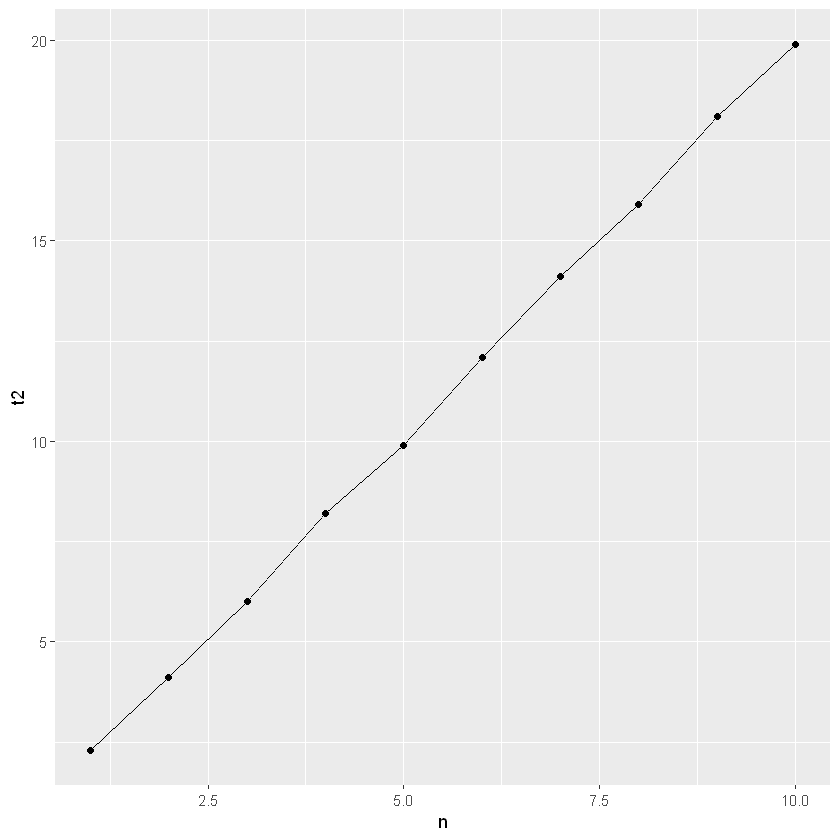

In [35]:
a + geom_line()
# nie podano nic do geom_line więc wykorzystano argumenty do ggplot(...)

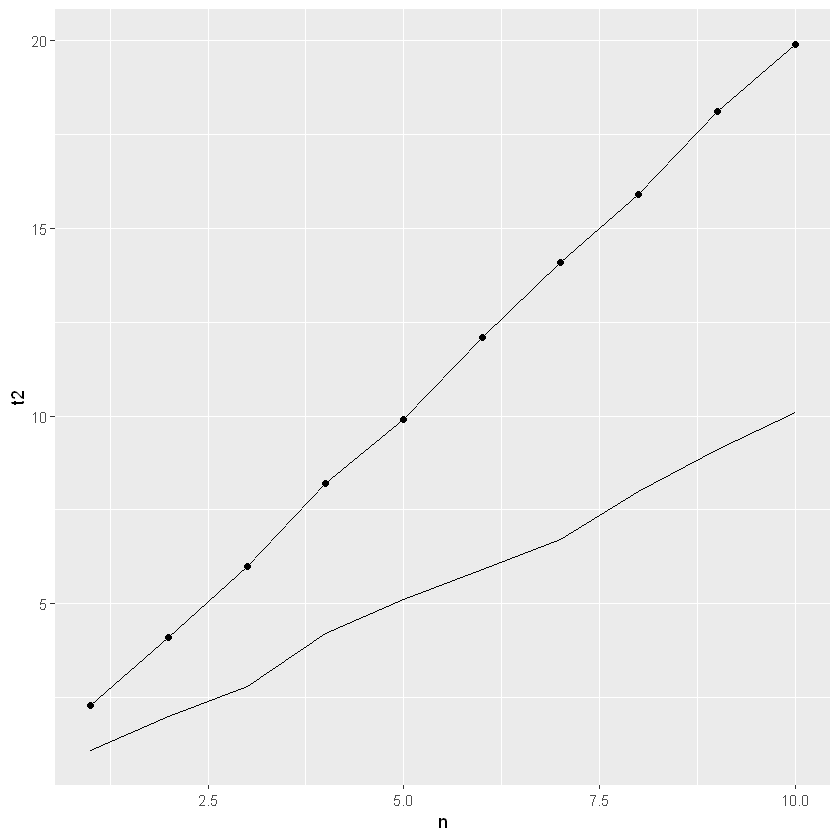

In [36]:
last_plot() + geom_line(aes(x=n, y=t1))
# tutaj podano inny aes, ale dalej odnosimy się do "results"

## Przykład analizy danych w czystym R

Przetwarzanie danych w tabeli

Dane w pliku [data2.txt](https://www.icsr.agh.edu.pl/~malawski/dydakt/mownit/R/data2.txt) mają postać tabeli faktów, w której wiersze są wynikami pomiarów. 

Przykładowo, zmierzono czas (time) dla różnych algorytmów (t1, t2).

Kolumna `alg` jest typu `factor` - jest to typ wyliczeniowy w R.

In [37]:
results <- read.csv("data2.txt")

results

n,alg,time,error
1,t1,1.010572,0.010572148
2,t1,1.981689,-0.018310993
3,t1,3.066268,0.066268043
4,t1,4.060221,0.060220570
5,t1,5.029502,0.029502051
6,t1,6.045928,0.045927536
7,t1,6.957461,-0.042538559
8,t1,8.009891,0.009891313
9,t1,9.053959,0.053959370
10,t1,9.982560,-0.017439984


Dodanie nowej kolumny:

In [39]:
results$speed <- results$n / results$time

results

n,alg,time,error,speed
1,t1,1.010572,0.010572148,0.9895385
2,t1,1.981689,-0.018310993,1.0092401
3,t1,3.066268,0.066268043,0.9783880
4,t1,4.060221,0.060220570,0.9851682
5,t1,5.029502,0.029502051,0.9941342
6,t1,6.045928,0.045927536,0.9924036
7,t1,6.957461,-0.042538559,1.0061141
8,t1,8.009891,0.009891313,0.9987651
9,t1,9.053959,0.053959370,0.9940402
10,t1,9.982560,-0.017439984,1.0017470


Grupowanie (agregacja)

Przyklad: zastosowanie funkcji FUN (tutaj: mean czyli obliczającej średnią) do wszystkich wartosci time dla takich samych n i alg:

In [40]:
avg_results <- aggregate(time ~ n:alg, data=results, FUN=mean)

avg_results

n,alg,time
1,t1,0.9990494
2,t1,2.0152520
3,t1,2.9867132
4,t1,3.9869472
5,t1,4.9716765
6,t1,6.0127196
7,t1,6.9400184
8,t1,8.0313431
9,t1,8.9836556
10,t1,9.9948604


Dołączenie kolumny z obliczonym odchyleniem standardowym (sd) do tabeli:

In [41]:
avg_results$sd <- aggregate(time ~ n:alg, data=results, FUN=sd)$time

In [42]:
avg_results

n,alg,time,sd
1,t1,0.9990494,0.04902917
2,t1,2.0152520,0.04664671
3,t1,2.9867132,0.07417292
4,t1,3.9869472,0.08150832
5,t1,4.9716765,0.06018547
6,t1,6.0127196,0.04730261
7,t1,6.9400184,0.01562886
8,t1,8.0313431,0.05328619
9,t1,8.9836556,0.04886179
10,t1,9.9948604,0.06245583


Agregacja kilku wielkości:

In [43]:
avg_results <- aggregate(cbind(time,speed) ~ n:alg, data=results, FUN=mean) 

In [44]:
avg_results

n,alg,time,speed
1,t1,0.9990494,1.0028054
2,t1,2.0152520,0.9928574
3,t1,2.9867132,1.0049406
4,t1,3.9869472,1.0036074
5,t1,4.9716765,1.0058149
6,t1,6.0127196,0.9979343
7,t1,6.9400184,1.0086470
8,t1,8.0313431,0.9961325
9,t1,8.9836556,1.0018430
10,t1,9.9948604,1.0005453


Filtrowanie danych:

In [45]:
avg_results$alg=="t1"

[1]  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE  TRUE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [46]:
avg_results[avg_results$alg=="t1",]

n,alg,time,speed
1,t1,0.9990494,1.0028054
2,t1,2.0152520,0.9928574
3,t1,2.9867132,1.0049406
4,t1,3.9869472,1.0036074
5,t1,4.9716765,1.0058149
6,t1,6.0127196,0.9979343
7,t1,6.9400184,1.0086470
8,t1,8.0313431,0.9961325
9,t1,8.9836556,1.0018430
10,t1,9.9948604,1.0005453


Rysowanie wykresów.

Wykres time w funkcji n:

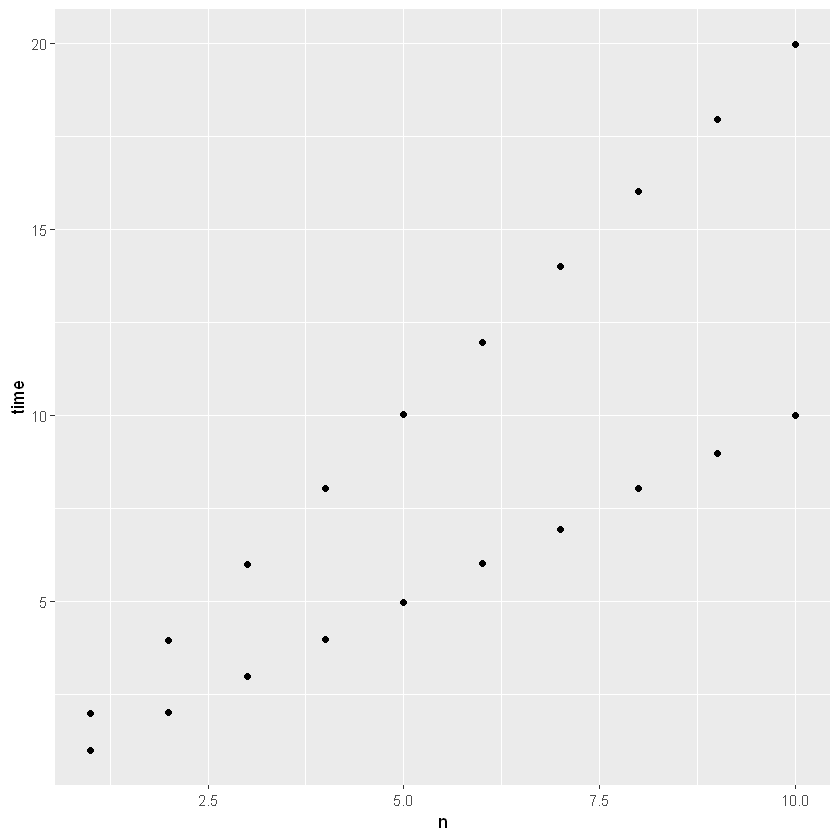

In [47]:
ggplot(avg_results, aes(n,time)) + geom_point()

Przykład skryptu rysującego wykres. 

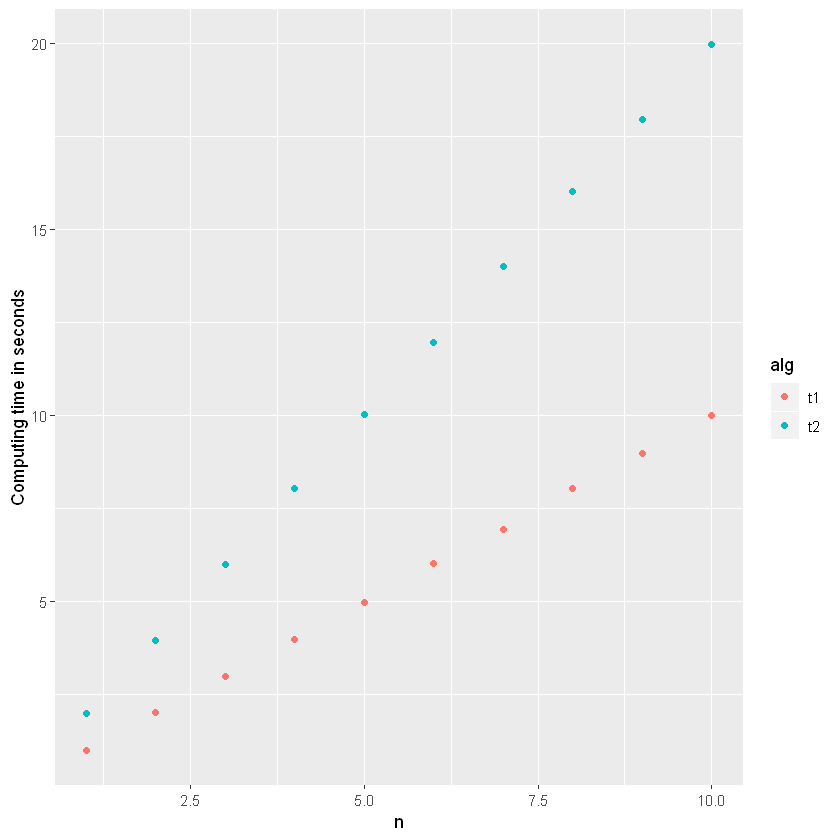

In [48]:
results <- read.csv("data2.txt")
results$speed <- results$n / results$time
avg_results <- aggregate( cbind(time,speed) ~ n:alg, data=results, FUN=mean) 
ggplot(avg_results, aes(n,time,color=alg)) + geom_point() + ylab("Computing time in seconds")

Możemy też uruchomić kod tworzący wykres z osobnego pliku

In [49]:
source("data2_plot.R")

Saving 6.67 x 6.67 in image


w bashu za pomoca polecenia:

```Rscript data2_plot.R```

W wyniku powstaje plik [myplot.png](myplot.png)

### Powyższy przykład z wykorzystaniem tidyverse

In [50]:
results <- read_csv("data2.txt")

Parsed with column specification:
cols(
  n = col_double(),
  alg = col_character(),
  time = col_double(),
  error = col_double()
)


Operator `%>%` pozwala przekazywać wyjście z jednej funkcji jako wejście kolejnej, co pozwala na tworzenie łańcucha wywołań funkcji (analogiczne do '|' w bashu).

In [51]:
avg_dplyr <- results %>% 
    mutate(speed = n/time) %>% # tylko aby pokazać mutate, nie wykorzystujemy do plota
    group_by(n, alg) %>%
    summarise(
        time_sd = sd(time),
        time = mean(time),
        speed = mean(speed)
    )  %>% 
    arrange(alg, n) #sortowanie
    
    

In [52]:
avg_dplyr

n,alg,time_sd,time,speed
1,t1,0.04902917,0.9990494,1.0028054
2,t1,0.04664671,2.0152520,0.9928574
3,t1,0.07417292,2.9867132,1.0049406
4,t1,0.08150832,3.9869472,1.0036074
5,t1,0.06018547,4.9716765,1.0058149
6,t1,0.04730261,6.0127196,0.9979343
7,t1,0.01562886,6.9400184,1.0086470
8,t1,0.05328619,8.0313431,0.9961325
9,t1,0.04886179,8.9836556,1.0018430
10,t1,0.06245583,9.9948604,1.0005453


Kolejność operacji w `summarise` ma znaczenie!

In [53]:
# zamieniona kolejność mean i sd
results %>%
    group_by(n, alg) %>%
    summarise(
        time = mean(time),
        time_sd = sd(time) # sd jest liczone dla jednego wiersza po agregracji, stad NA w wynikach
    )  %>% 
    arrange(alg, n)

n,alg,time,time_sd
1,t1,0.9990494,NA
2,t1,2.0152520,NA
3,t1,2.9867132,NA
4,t1,3.9869472,NA
5,t1,4.9716765,NA
6,t1,6.0127196,NA
7,t1,6.9400184,NA
8,t1,8.0313431,NA
9,t1,8.9836556,NA
10,t1,9.9948604,NA


Wykres rysowany jak poprzednio

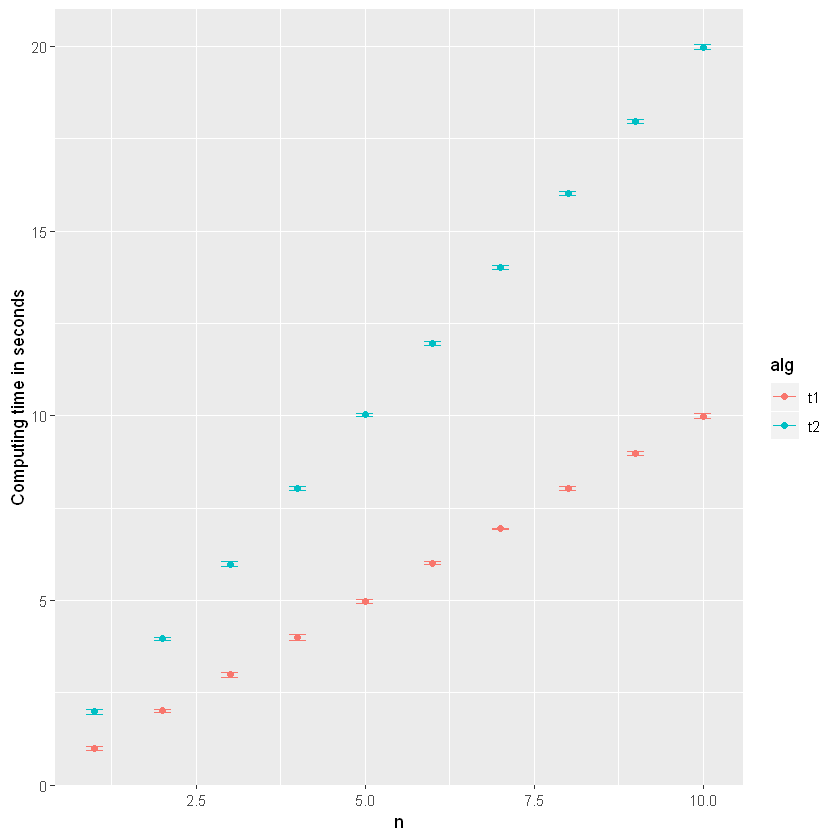

In [54]:
ggplot(avg_dplyr, aes(n, time, color=alg)) + geom_point() + ylab("Computing time in seconds") + 
    geom_errorbar(aes(ymin = time-time_sd, ymax = time+time_sd, width=.25))

Przykład filtrowania i wybierania kolumn

In [55]:
# wybieranie wierszy spełniających warunek
avg_dplyr %>% filter(alg=="t1")

n,alg,time_sd,time,speed
1,t1,0.04902917,0.9990494,1.0028054
2,t1,0.04664671,2.0152520,0.9928574
3,t1,0.07417292,2.9867132,1.0049406
4,t1,0.08150832,3.9869472,1.0036074
5,t1,0.06018547,4.9716765,1.0058149
6,t1,0.04730261,6.0127196,0.9979343
7,t1,0.01562886,6.9400184,1.0086470
8,t1,0.05328619,8.0313431,0.9961325
9,t1,0.04886179,8.9836556,1.0018430
10,t1,0.06245583,9.9948604,1.0005453


In [56]:
avg_dplyr

n,alg,time_sd,time,speed
1,t1,0.04902917,0.9990494,1.0028054
2,t1,0.04664671,2.0152520,0.9928574
3,t1,0.07417292,2.9867132,1.0049406
4,t1,0.08150832,3.9869472,1.0036074
5,t1,0.06018547,4.9716765,1.0058149
6,t1,0.04730261,6.0127196,0.9979343
7,t1,0.01562886,6.9400184,1.0086470
8,t1,0.05328619,8.0313431,0.9961325
9,t1,0.04886179,8.9836556,1.0018430
10,t1,0.06245583,9.9948604,1.0005453


In [57]:
# wybór kolumn
avg_dplyr %>% ungroup() %>% select(time, speed) %>% head()

time,speed
0.9990494,1.0028054
2.0152520,0.9928574
2.9867132,1.0049406
3.9869472,1.0036074
4.9716765,1.0058149
6.0127196,0.9979343


In [58]:
# usuwanie kolumn
avg_dplyr %>% select(-alg) %>% head()

n,time_sd,time,speed
1,0.04902917,0.9990494,1.0028054
2,0.04664671,2.0152520,0.9928574
3,0.07417292,2.9867132,1.0049406
4,0.08150832,3.9869472,1.0036074
5,0.06018547,4.9716765,1.0058149
6,0.04730261,6.0127196,0.9979343


## Zadanie

Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**
2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**
3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów)  **(1p.)**